In [142]:
import random 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
df_fft.head()

,ts_1,no_1,class_1,ts_2,no_2,class_2,type,match_score,min_kpi
0,Coffee,11,0,Coffee,5,5,fft,11111,d_m
1,Coffee,11,0,Coffee,10,10,fft,11111,d_mean
2,Coffee,11,0,Coffee,13,13,fft,11111,d_std
3,Coffee,11,0,Coffee,26,26,fft,11111,d_q25
4,Coffee,11,0,Coffee,26,26,fft,11111,d_q50


In [3]:
df_dtw.head()

,ts_1,no_1,class_1,ts_2,no_2,class_2,min_dtw_dist
0,ArrowHead,153,2,ArrowHead,8,2,11.453478
1,ArrowHead,154,2,ArrowHead,17,2,7.934686
2,InsectWingbeatSound,98,8,InsectWingbeatSound,175,7,24.418690
3,InsectWingbeatSound,174,5,InsectWingbeatSound,170,9,32.303582
4,InsectWingbeatSound,194,4,InsectWingbeatSound,61,4,16.177841


### Same time series identified

In [12]:
df_dtw[(df_dtw['ts_1']==df_dtw['ts_2'])&
       (df_dtw['no_1']==df_dtw['no_2'])].shape

(19, 7)

In [15]:
types = df_fft['type'].unique().tolist()
kpi_types = df_fft['min_kpi'].unique().tolist()

In [17]:
for fft_type in types:
    for kpi_type in kpi_types:
        res_shape = df_fft[(df_fft['ts_1']==df_fft['ts_2'])&
           (df_fft['no_1']==df_fft['no_2']) &
              (df_fft['type']==fft_type) &
              (df_fft['min_kpi']==kpi_type)].shape
               
        print("{} - {}: {}".format(fft_type, kpi_type, res_shape[0]))

fft - d_m: 4
fft - d_mean: 4
fft - d_std: 3
fft - d_q25: 3
fft - d_q50: 3
fft - d_q75: 2
fft - d_min: 5
fft - d_max: 2
Hamming - d_m: 4
Hamming - d_mean: 5
Hamming - d_std: 4
Hamming - d_q25: 5
Hamming - d_q50: 5
Hamming - d_q75: 5
Hamming - d_min: 4
Hamming - d_max: 4
Welch - d_m: 6
Welch - d_mean: 3
Welch - d_std: 12
Welch - d_q25: 6
Welch - d_q50: 5
Welch - d_q75: 10
Welch - d_min: 8
Welch - d_max: 6


### Same class identified

In [18]:
df_dtw[(df_dtw['ts_1']==df_dtw['ts_2'])&
       (df_dtw['class_1']==df_dtw['class_2'])].shape

(658, 7)

In [19]:
for fft_type in types:
    for kpi_type in kpi_types:
        res_shape = df_fft[(df_fft['ts_1']==df_fft['ts_2'])&
           (df_fft['class_1']==df_fft['class_2']) &
              (df_fft['type']==fft_type) &
              (df_fft['min_kpi']==kpi_type)].shape
               
        print("{} - {}: {}".format(fft_type, kpi_type, res_shape[0]))

fft - d_m: 6
fft - d_mean: 2
fft - d_std: 3
fft - d_q25: 2
fft - d_q50: 1
fft - d_q75: 1
fft - d_min: 3
fft - d_max: 1
Hamming - d_m: 1
Hamming - d_mean: 0
Hamming - d_std: 0
Hamming - d_q25: 1
Hamming - d_q50: 0
Hamming - d_q75: 0
Hamming - d_min: 0
Hamming - d_max: 0
Welch - d_m: 37
Welch - d_mean: 3
Welch - d_std: 12
Welch - d_q25: 5
Welch - d_q50: 5
Welch - d_q75: 6
Welch - d_min: 6
Welch - d_max: 7


In [35]:
df_dtw[df_dtw.set_index(['ts_1','no_1']).index.isin(sels)]

,ts_1,no_1,class_1,ts_2,no_2,class_2,min_dtw_dist
83,DodgerLoopWeekend,70,1,MelbournePedestrian,1008,9,1123.000000
140,BeetleFly,9,1,ShapesAll,63,7,52.215457
161,Wine,26,1,Wine,52,2,2.360618
170,DodgerLoopWeekend,70,1,MelbournePedestrian,1008,9,1123.000000
314,ElectricDevices,4993,2,ElectricDevices,354,2,44.477761
917,SmallKitchenAppliances,292,3,SmallKitchenAppliances,358,3,1.143459


In [ ]:
df_dtw.shape

(1420, 7)

In [124]:
df_train.head()

,name,no,0,1,2,3,4,5,6,7,...,2835,2836,2837,2838,2839,2840,2841,2842,2843,2844
0,SyntheticControl,0,1,-0.376936,1.224864,0.343874,0.328454,-0.337609,1.026514,-1.330996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SyntheticControl,1,1,0.644406,0.413269,-0.862278,-1.497386,-0.421458,-0.214215,-1.292131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SyntheticControl,2,1,-0.978667,-0.406232,0.822429,-1.408242,-1.676734,-0.490632,1.404598,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SyntheticControl,3,1,-0.236537,-0.098175,0.367092,1.366860,0.498281,-0.300223,1.715634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SyntheticControl,4,1,1.490735,1.325243,1.626829,-0.317056,-1.098990,-0.022213,0.596980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
population = list(df_dtw.set_index(['ts_1','no_1']).index.unique())
sels = random.choices(population, k=5)

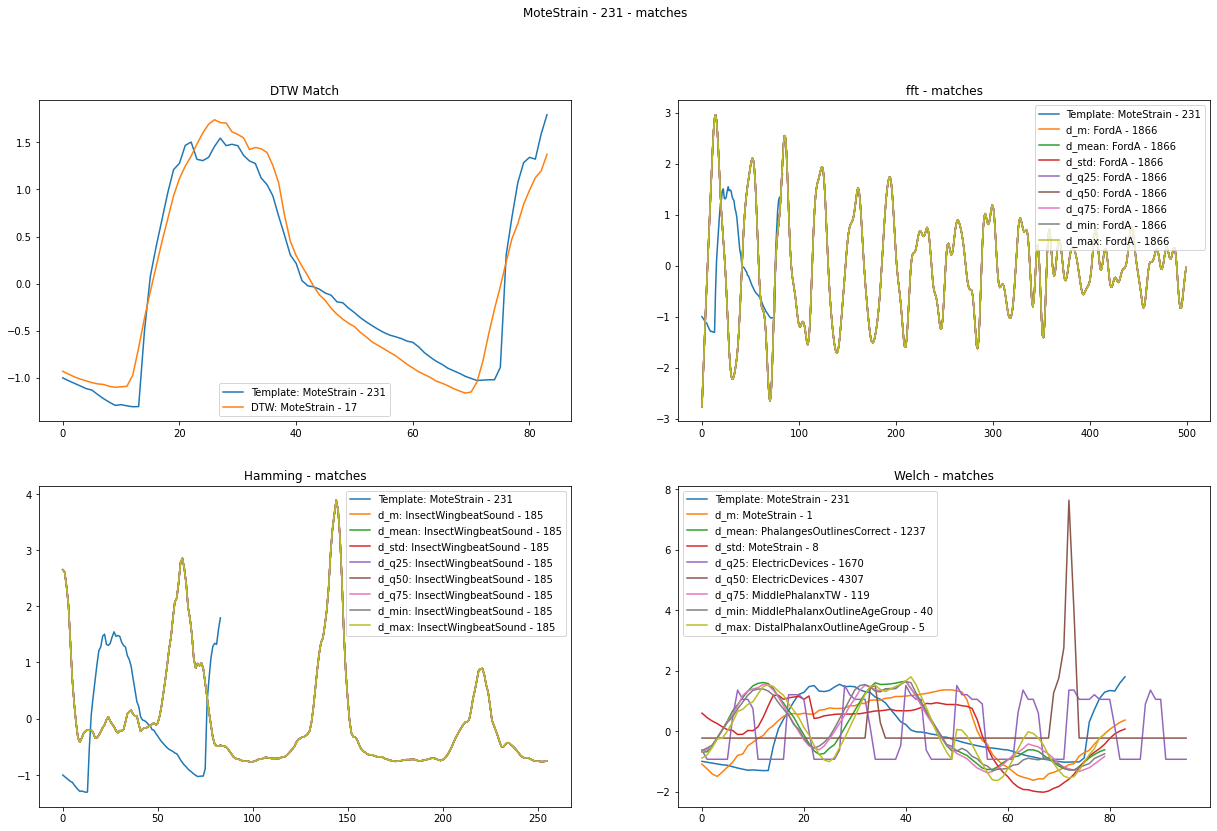

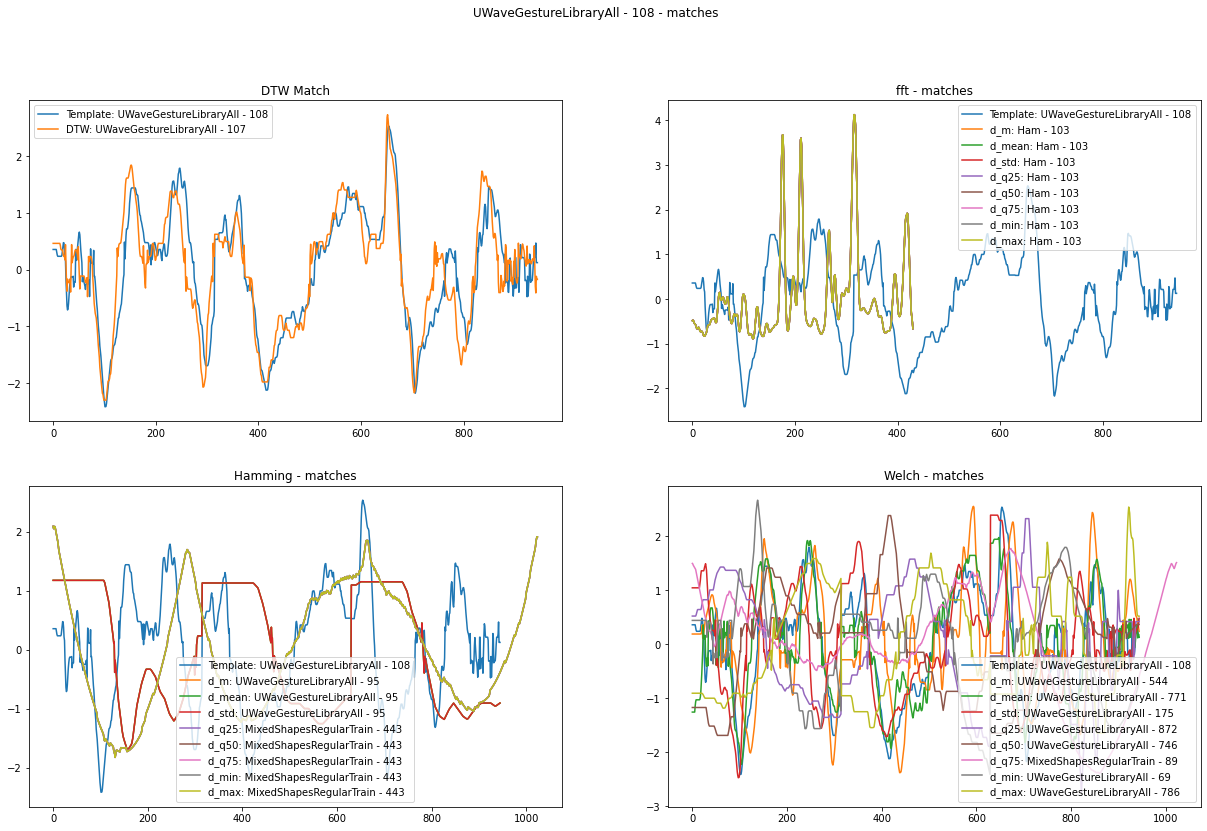

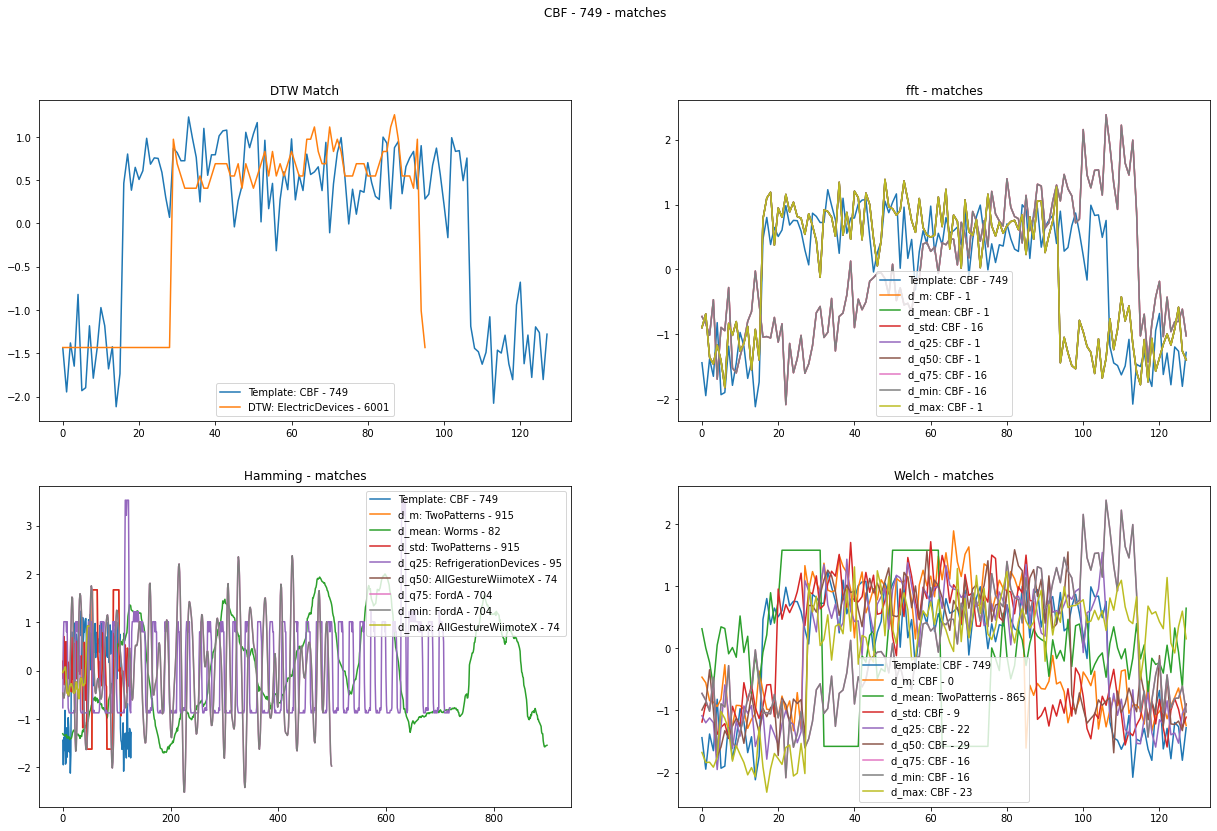

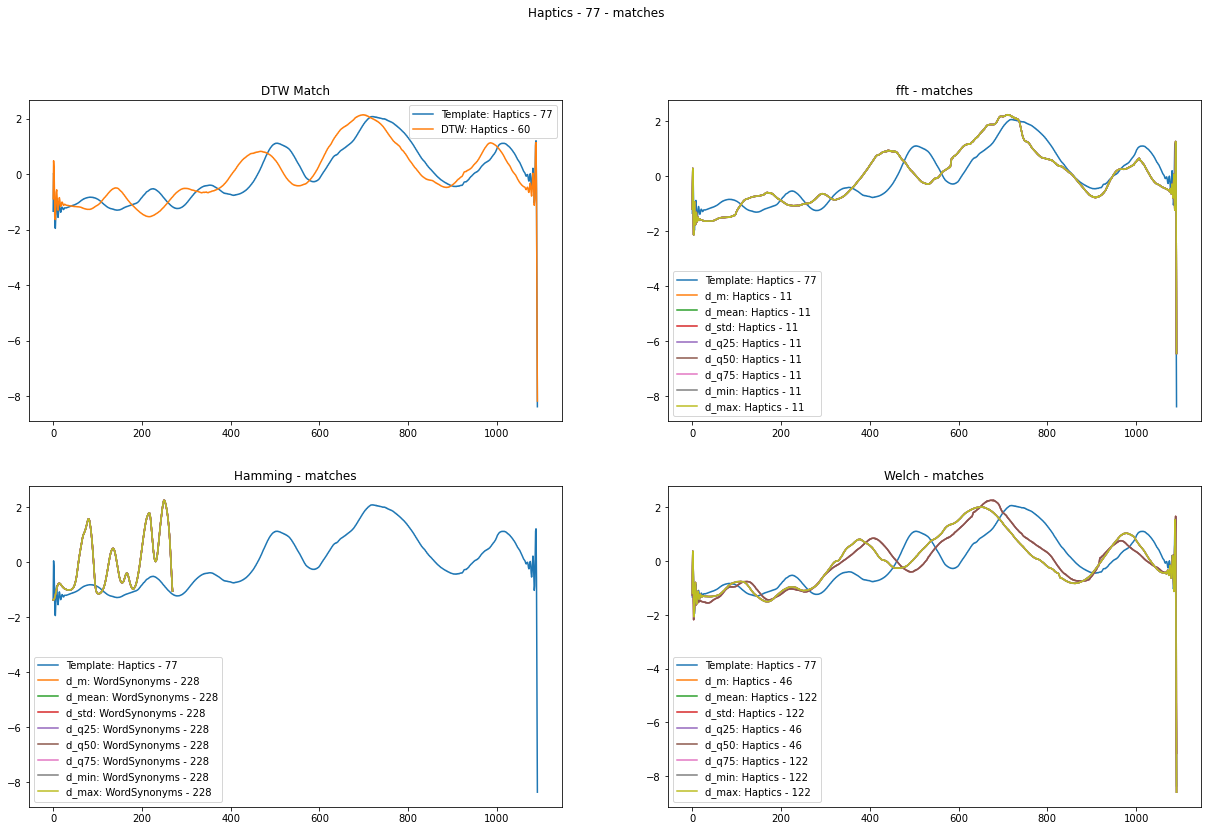

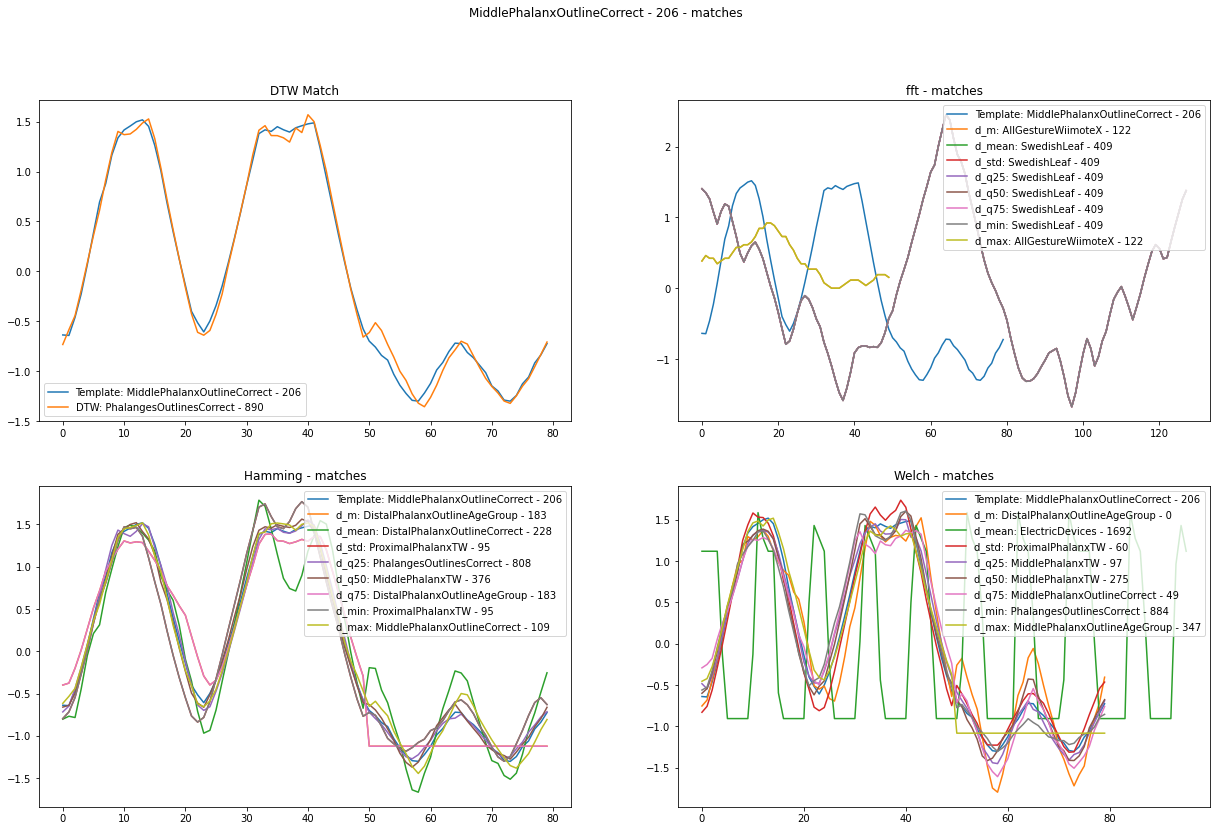

In [200]:
for elm in sels:
    ts_1 = elm[0]
    no_1 = elm[1]
    dtw_tmp = df_dtw[(df_dtw['ts_1']==ts_1) &
                    (df_dtw['no_1']==no_1)]
    df_fft_tmp = df_fft[(df_fft['ts_1']==ts_1) &
                        (df_fft['no_1']==no_1)]

    ar_tmpl = np.array(df_test[(df_test['name']==ts_1) &
                                 (df_test['no']==no_1)].iloc[:,3:].dropna(axis=1))[0]
    
    # getting dtw results
    dtw_name = dtw_tmp['ts_2'].values[0]
    dtw_no = dtw_tmp['no_2'].values[0]

    dtw_ar = np.array(df_train[(df_train['name']==dtw_name)&
                               (df_train['no']==dtw_no)].iloc[:,3:].dropna(axis=1))[0]
    # getting FFT results
    types = df_fft_tmp['type'].unique()
    kpis = df_fft_tmp['min_kpi'].unique()
    fft_l = []
    for fft_type in types:
        for kpi in kpis:
            s_tmp = df_fft_tmp[(df_fft_tmp['type']==fft_type)&
                                (df_fft_tmp['min_kpi']==kpi)]
            ts_name = s_tmp['ts_2'].values[0]
            ts_no = s_tmp['no_2'].values[0]
            ar_tmp = np.array(df_train[(df_train['name']==ts_name)&
                                      (df_train['no']==ts_no)]\
                              .iloc[:,3:].dropna(axis=1))[0]
            res_tup = fft_type, kpi,\
                    ts_name, ts_no, ar_tmp
            fft_l.append(res_tup)
    
    # Set up visualization
    fig, axes = plt.subplots(2,2,figsize=(21,13))
    fig.suptitle("{} - {} - matches".format(ts_1, no_1))
    
    axes.flatten()[0].set_title("DTW Match")
    axes.flatten()[1].set_title("FFT Match")
    axes.flatten()[2].set_title("Hamming Match")
    axes.flatten()[3].set_title("Welch Match")
    
    sns.lineplot(data=ar_tmpl,
                 label="Template: {} - {}".format(ts_1,no_1),
                 ax=axes.flatten()[0])
    sns.lineplot(data=ar_tmpl,
                 label="Template: {} - {}".format(ts_1,no_1),
                 ax=axes.flatten()[1])
    sns.lineplot(data=ar_tmpl,
                 label="Template: {} - {}".format(ts_1,no_1),
                 ax=axes.flatten()[2])
    sns.lineplot(data=ar_tmpl,
                 label="Template: {} - {}".format(ts_1,no_1),
                 ax=axes.flatten()[3])
        
    # DTW Frame
    sns.lineplot(data=dtw_ar, label="DTW: {} - {}".format(dtw_name, dtw_no),
                 ax=axes.flatten()[0])
    
    # FFT Matches
    chart_match = {
        'fft': 1,
        'Hamming': 2,
        'Welch': 3
        
    }
    for match in fft_l:
        fft_type = match[0]
        chart = chart_match[fft_type]
        axes.flatten()[chart].set_title("{} - matches".format(fft_type))
        sns.lineplot(data=match[4],
                     label="{}: {} - {}".format(match[1],
                                                match[2],
                                                match[3]),
                     ax=axes.flatten()[chart])

In [201]:
sels

[('MoteStrain', 231),
 ('UWaveGestureLibraryAll', 108),
 ('CBF', 749),
 ('Haptics', 77),
 ('MiddlePhalanxOutlineCorrect', 206)]

### Interesting results

In [198]:
[('Haptics', 38),
 ('Worms', 30),
 ('UMD', 21),
 ('PLAID', 505),
 ('DodgerLoopGame', 77)]

[('Haptics', 38),
 ('Worms', 30),
 ('UMD', 21),
 ('PLAID', 505),
 ('DodgerLoopGame', 77)]

In [202]:
[('MoteStrain', 231),
 ('UWaveGestureLibraryAll', 108),
 ('CBF', 749),
 ('Haptics', 77),
 ('MiddlePhalanxOutlineCorrect', 206)]

[('MoteStrain', 231),
 ('UWaveGestureLibraryAll', 108),
 ('CBF', 749),
 ('Haptics', 77),
 ('MiddlePhalanxOutlineCorrect', 206)]